<a href="https://colab.research.google.com/github/amarjit03/ANN-model-building-for-beginner/blob/main/Churn_Rate_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv("/content/Churn_Modelling.csv")

In [4]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.shape

(10000, 14)

In [6]:
data.duplicated().sum()

0

In [7]:
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [8]:
data['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [9]:
data['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [10]:
data.drop(columns= ['RowNumber','CustomerId','Surname'],inplace = True)

In [11]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
data = data.astype(int)


In [12]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [13]:
print(data.head(1))

   CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0          619   42       2        0              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1           101348       1                  0   

   Geography_Spain  Gender_Male  
0                0            0  


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('Exited',axis = 1),data['Exited'],test_size = 0.2,random_state = 1)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(11,activation = 'relu',input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics =['accuracy'])

In [24]:
history = model.fit(X_train_scaled,y_train,epochs = 100,validation_split =0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7378 - loss: 0.5960 - val_accuracy: 0.7975 - val_loss: 0.4745
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.4624 - val_accuracy: 0.8012 - val_loss: 0.4416
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8172 - loss: 0.4172 - val_accuracy: 0.8188 - val_loss: 0.4259
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8314 - loss: 0.4081 - val_accuracy: 0.8238 - val_loss: 0.4145
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8252 - loss: 0.4143 - val_accuracy: 0.8288 - val_loss: 0.4073
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8279 - loss: 0.3952 - val_accuracy: 0.8263 - val_loss: 0.4008
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8314 - loss: 0.3917 - val_accuracy: 0.8288 - val_loss: 0.3945
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8380 - loss: 0.3747 - val_accu

In [25]:
model.layers[0].get_weights()

[array([[-9.25886035e-02,  4.23898786e-01, -3.00423391e-02,
         -1.21186405e-01,  4.36158702e-02,  1.54092193e-01,
         -2.81227566e-02, -8.39974210e-02,  8.91187228e-03,
          4.31793407e-02, -5.42279296e-02],
        [-2.63886422e-01,  4.24924612e-01,  1.62226129e-02,
         -2.74621427e-01, -7.18929112e-01, -1.19608724e+00,
         -9.87489998e-01, -1.46880478e-01,  7.70319521e-01,
          1.91950232e-01,  1.48555651e-01],
        [-1.91184610e-01, -3.04710686e-01,  5.00368848e-02,
         -2.43244335e-01, -1.35100216e-01,  2.28985474e-01,
          1.03698056e-02,  4.53036427e-01,  1.12548210e-01,
          1.93148125e-02,  1.04109570e-01],
        [ 9.39556003e-01, -3.93705666e-01,  1.23567343e+00,
          3.09522688e-01, -1.00163877e-01,  2.26704702e-01,
         -7.47637570e-01, -7.84087896e-01, -7.13046715e-02,
          5.84777355e-01,  7.48032779e-02],
        [-3.63220960e-01, -4.96161245e-02, -8.75116885e-02,
          8.42555612e-02, -1.28809378e-01, -

In [26]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [27]:
y_pred = np.where(y_log > 0.5,1,0)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

0.8675

In [30]:
import matplotlib.pyplot as plt

In [31]:
history

In [32]:
history.history

{'accuracy': [0.7785937786102295,
  0.7987499833106995,
  0.8123437762260437,
  0.8257812261581421,
  0.8279687762260437,
  0.8287500143051147,
  0.8314062356948853,
  0.8324999809265137,
  0.8379687666893005,
  0.8409374952316284,
  0.8471875190734863,
  0.8518750071525574,
  0.8559374809265137,
  0.8565624952316284,
  0.859375,
  0.8603125214576721,
  0.8592187762260437,
  0.8595312237739563,
  0.8595312237739563,
  0.860156238079071,
  0.8595312237739563,
  0.8607812523841858,
  0.8645312786102295,
  0.8620312213897705,
  0.8603125214576721,
  0.8615624904632568,
  0.8618749976158142,
  0.8634374737739563,
  0.8609374761581421,
  0.8634374737739563,
  0.8628125190734863,
  0.8609374761581421,
  0.8634374737739563,
  0.8620312213897705,
  0.862500011920929,
  0.8631250262260437,
  0.8650000095367432,
  0.8659374713897705,
  0.8637499809265137,
  0.8660937547683716,
  0.8676562309265137,
  0.8653125166893005,
  0.8651562333106995,
  0.8650000095367432,
  0.8670312762260437,
  0.867343

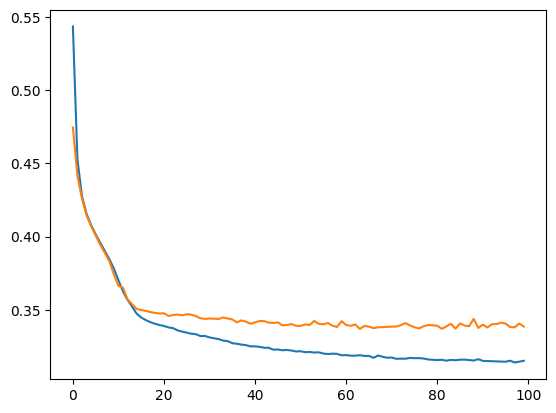

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


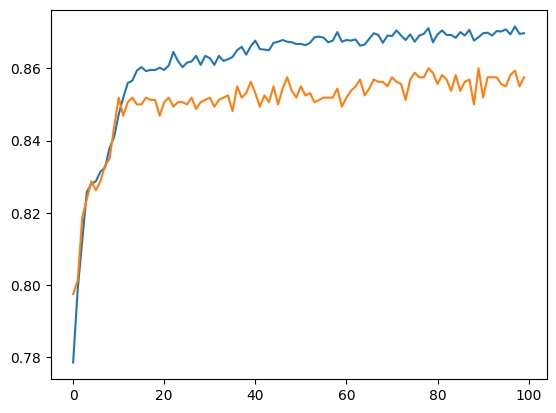

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
